<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [ ]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

In [ ]:
# To-Do: create a virtual environement called data_analytics
!python -m venv data_analytics

In [ ]:
# Activate the environement for windows
!C:/Users/HP/Desktop/data-science-bootcamp/data-science-bootcamp_code/ch2_data_analytics/unit2_project/Data-Science-Bootcamp_Unit2-Project/data_analytics/Scripts/activate

In [ ]:
# Adding the environement to Jupyter
!python -m ipykernel install --user --name=data_analytics

In [ ]:
# Activate the environement for linux (debian based)
!. data_analytics/bin/activate

### 2. Importing necessary tools:<a id='importing'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [2]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df
df = pd.read_csv("kc_house_data.csv")

# To-Do: Print the dataframe's shape
df.shape

(21613, 21)

In [3]:
# To-Do: Print the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21606 non-null  object 
 2   price          21608 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21612 non-null  float64
 6   sqft_lot       21612 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21609 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21611 non-null  float64
 15  yr_renovated   21612 non-null  float64
 16  zipcode        21611 non-null  float64
 17  lat            21612 non-null  float64
 18  long  

### 4. NA handling:<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

In [4]:
# To-Do: deal with the NAs in your dataset in one line
# Giving the number of the na values
df.isna().sum()

id               0
date             7
price            5
bedrooms         0
bathrooms        0
sqft_living      1
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       4
sqft_basement    0
yr_built         2
yr_renovated     1
zipcode          2
lat              1
long             0
sqft_living15    1
sqft_lot15       0
dtype: int64

###### To deal with these NA values, we can replace them the mean of the varaibles, and it is possible because all the variables are numerical except the "id" and the "date" 

In [5]:
#imputation with the mean 
df.fillna(df.mean(),inplace=True) #this function works only for numerical type

### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be delted without impacting the results.

Delete the column that correspond to variables that aren't needed.

In [6]:
# To-Do: delete the values of the variables that are useless
df= df.drop(columns=['id','date']) #the id and the date are not giving any useful information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  float64
 4   sqft_lot       21613 non-null  float64
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  float64
 13  yr_renovated   21613 non-null  float64
 14  zipcode        21613 non-null  float64
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  float64
 18  sqft_l

### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

<center>pd.unique(df['column_name'])</center>

In [8]:
# To-Do : get to know more your data WITHOUT modifying it !!
df.mean()

price            540123.126064
bedrooms              3.370842
bathrooms             2.114757
sqft_living        2079.865491
sqft_lot          15107.429669
floors                1.494309
waterfront            0.007542
view                  0.234303
condition             3.409430
grade                 7.656873
sqft_above         1788.404739
sqft_basement       291.509045
yr_built           1971.002406
yr_renovated         84.406163
zipcode           98077.939753
lat                  47.560055
long               -122.213896
sqft_living15      1986.566213
sqft_lot15        12768.455652
dtype: float64

In [9]:
df.median()

price            450000.0000
bedrooms              3.0000
bathrooms             2.2500
sqft_living        1910.0000
sqft_lot           7620.0000
floors                1.5000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1560.0000
sqft_basement         0.0000
yr_built           1975.0000
yr_renovated          0.0000
zipcode           98065.0000
lat                  47.5718
long               -122.2300
sqft_living15      1840.0000
sqft_lot15         7620.0000
dtype: float64

In [10]:
#getting the first quartile of each variable
df.quantile(0.25)

price            322000.000
bedrooms              3.000
bathrooms             1.750
sqft_living        1427.000
sqft_lot           5040.000
floors                1.000
waterfront            0.000
view                  0.000
condition             3.000
grade                 7.000
sqft_above         1190.000
sqft_basement         0.000
yr_built           1951.000
yr_renovated          0.000
zipcode           98033.000
lat                  47.471
long               -122.328
sqft_living15      1490.000
sqft_lot15         5100.000
Name: 0.25, dtype: float64

In [11]:
#getting the third quartile of each variable
df.quantile(0.75)

price            645000.000
bedrooms              4.000
bathrooms             2.500
sqft_living        2550.000
sqft_lot          10689.000
floors                2.000
waterfront            0.000
view                  0.000
condition             4.000
grade                 8.000
sqft_above         2210.000
sqft_basement       560.000
yr_built           1997.000
yr_renovated          0.000
zipcode           98118.000
lat                  47.678
long               -122.125
sqft_living15      2360.000
sqft_lot15        10083.000
Name: 0.75, dtype: float64

In [12]:
pd.unique(df["price"])

array([ 221900.,  538000.,  180000., ...,  610685., 1007500.,  402101.])

### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

In [13]:
# To-Do : detect the outliers then delete them ad delete the column created to calculate the Z-score
import numpy as np

outliers=[]
threshold=3  #fix the threshold
for col in df :
    mean=df[col].mean()
    std=df[col].std()
    df[col+"_zscore"]= (df[col] - mean)/std 
    df=df[np.abs(df[col+"_zscore"])<threshold]  #getting rid of the outliers
    df=df.drop(columns=[col+"_zscore"]) #deleting the added column

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18085 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18085 non-null  float64
 1   bedrooms       18085 non-null  int64  
 2   bathrooms      18085 non-null  float64
 3   sqft_living    18085 non-null  float64
 4   sqft_lot       18085 non-null  float64
 5   floors         18085 non-null  float64
 6   waterfront     18085 non-null  int64  
 7   view           18085 non-null  int64  
 8   condition      18085 non-null  int64  
 9   grade          18085 non-null  int64  
 10  sqft_above     18085 non-null  float64
 11  sqft_basement  18085 non-null  int64  
 12  yr_built       18085 non-null  float64
 13  yr_renovated   18085 non-null  float64
 14  zipcode        18085 non-null  float64
 15  lat            18085 non-null  float64
 16  long           18085 non-null  float64
 17  sqft_living15  18085 non-null  float64
 18  sqft_l

#### We can notice a decrease in the number of entries 

### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

<AxesSubplot:>

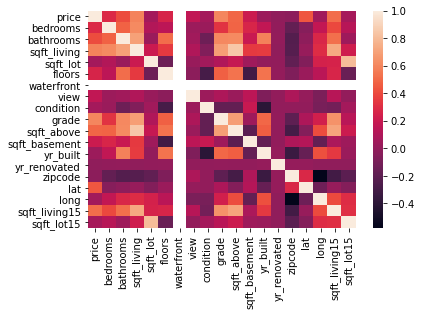

In [15]:
# To-Do : perform feature selection using correlation
sns.heatmap(df.corr())

In [16]:
# To-Do : drop the variables that seem highly correlated to you
corr_matrix = df.corr().abs()  # calculate the correlation matrix and retreive the absolute values 

# retreive the upper or lower triangular part of the correlation matrix without the diagonal
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool)) 

# get the columns where the correlation coefficient is greater than 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)] 
print(to_drop)

df = df.drop(columns = to_drop)


['sqft_above', 'sqft_lot15']


### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [17]:
# Splitting the data into dependant and independant variables
Y = df['price']
X = df.drop(['price'],axis = 1)

In [18]:
from sklearn.linear_model import LinearRegression
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data
model = LinearRegression()

result = model.fit(X,Y) #train the model

In [19]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
result.score(X, Y)

0.6591147074902839

## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.